In [9]:
# -----------------------------
# Data manipulation
# -----------------------------
import pandas as pd
import numpy as np
import json

# -----------------------------
# Plotting
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from io import StringIO

In [10]:
# URL for country_lists.csv
url_country = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-09/country_lists.csv"

# Fetch CSV via requests (disable SSL verification temporarily)
response = requests.get(url_country, verify=False)
csv_data = StringIO(response.text)

# Read into pandas DataFrame
country_lists = pd.read_csv(csv_data)

# Quick check
print("Country Lists:")
country_lists.head()

c:\Users\ilyas\OneDrive\Desktop\DSA2101\src\venv-dsa2101\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Country Lists:


,code,country,visa_required,visa_online,visa_on_arrival,visa_free_access,electronic_travel_authorisation
0,PS,Palestinian Territory,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AG"",""name"":""Antigua and Barbuda""},{...","[[{""code"":""BD"",""name"":""Bangladesh""},{""code"":""B...","[[{""code"":""BO"",""name"":""Bolivia""},{""code"":""CK"",...","[[{""code"":""LK"",""name"":""Sri Lanka""},{""code"":""KE..."
1,AD,Andorra,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AO"",""name"":""Angola""},{""code"":""AZ"",""...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA..."
2,VA,Vatican City,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""AL"",""name"":""Albania""},{""code"":""AD"",...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA..."
3,SM,San Marino,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA..."
4,MC,Monaco,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA..."


In [11]:


def flatten_json_list(x):
    if pd.isnull(x):
        return []
    parsed = json.loads(x)
    # Flatten the list of lists
    flat = [item for sublist in parsed for item in sublist]
    return flat

visa_columns = [
    'visa_required',
    'visa_online',
    'visa_on_arrival',
    'visa_free_access',
    'electronic_travel_authorisation'
]

for col in visa_columns:
    country_lists[col + "_parsed"] = country_lists[col].apply(flatten_json_list)



In [12]:
for col in visa_columns:
    country_lists[col + "_codes"] = country_lists[col + "_parsed"].apply(lambda lst: [d['code'] for d in lst])
    country_lists[col + "_names"] = country_lists[col + "_parsed"].apply(lambda lst: [d['name'] for d in lst])
    country_lists[col + "_count"] = country_lists[col + "_parsed"].apply(len)

country_lists.head()


,code,country,visa_required,visa_online,visa_on_arrival,visa_free_access,electronic_travel_authorisation,visa_required_parsed,visa_online_parsed,visa_on_arrival_parsed,...,visa_online_count,visa_on_arrival_codes,visa_on_arrival_names,visa_on_arrival_count,visa_free_access_codes,visa_free_access_names,visa_free_access_count,electronic_travel_authorisation_codes,electronic_travel_authorisation_names,electronic_travel_authorisation_count
0,PS,Palestinian Territory,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AG"",""name"":""Antigua and Barbuda""},{...","[[{""code"":""BD"",""name"":""Bangladesh""},{""code"":""B...","[[{""code"":""BO"",""name"":""Bolivia""},{""code"":""CK"",...","[[{""code"":""LK"",""name"":""Sri Lanka""},{""code"":""KE...","[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AG', 'name': 'Antigua and Barbuda'}...","[{'code': 'BD', 'name': 'Bangladesh'}, {'code'...",...,40,"[BD, BI, KH, CV, KM, GW, IR, LA, MO, MV, MZ, P...","[Bangladesh, Burundi, Cambodia, Cape Verde Isl...",21,"[BO, CK, DM, EC, JO, MY, FM, NI, NU, VC, SZ, V...","[Bolivia, Cook Islands, Dominica, Ecuador, Jor...",15,"[LK, KE, SC]","[Sri Lanka, Kenya, Seychelles]",3
1,AD,Andorra,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AO"",""name"":""Angola""},{""code"":""AZ"",""...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA...","[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AO', 'name': 'Angola'}, {'code': 'A...","[{'code': 'BH', 'name': 'Bahrain'}, {'code': '...",...,23,"[BH, BD, BI, KH, CV, KM, EG, GW, IR, JM, JO, K...","[Bahrain, Bangladesh, Burundi, Cambodia, Cape ...",35,"[JP, AL, AI, AG, AR, AM, AW, AT, BS, BY, BE, B...","[Japan, Albania, Anguilla, Antigua and Barbuda...",120,"[AU, CA, GU, NZ, MP, PR, AS, LK, US, VI, KR, K...","[Australia, Canada, Guam, New Zealand, Norther...",16
2,VA,Vatican City,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""AL"",""name"":""Albania""},{""code"":""AD"",...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA...","[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AZ', 'name': 'Azerbaijan'}, {'code'...","[{'code': 'BH', 'name': 'Bahrain'}, {'code': '...",...,23,"[BH, BD, BI, KH, CV, KM, GW, IR, JO, KW, LA, M...","[Bahrain, Bangladesh, Burundi, Cambodia, Cape ...",31,"[AL, AD, AG, AR, AM, AW, AT, BS, BY, BE, BZ, B...","[Albania, Andorra, Antigua and Barbuda, Argent...",114,"[AU, CA, NZ, LK, KR, KE, SC, GB, KN]","[Australia, Canada, New Zealand, Sri Lanka, So...",9
3,SM,San Marino,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA...","[{'code': 'AF', 'name': 'Afghanistan'}, {'code...","[{'code': 'AZ', 'name': 'Azerbaijan'}, {'code'...","[{'code': 'BH', 'name': 'Bahrain'}, {'code': '...",...,23,"[BH, BD, BO, BI, KH, CV, KM, EG, GW, IR, JO, K...","[Bahrain, Bangladesh, Bolivia, Burundi, Cambod...",33,"[JP, AL, AD, AI, AG, AR, AM, AW, AT, BS, BB, B...","[Japan, Albania, Andorra, Anguilla, Antigua an...",122,"[AU, CA, GU, NZ, MP, PR, AS, LK, US, VI, KR, S...","[Australia, Canada, Guam, New Zealand, Norther...",15
4,MC,Monaco,"[[{""code"":""AF"",""name"":""Afghanistan""},{""code"":""...","[[{""code"":""AZ"",""name"":""Azerbaijan""},{""code"":""B...","[[{""code"":""BH"",""name"":""Bahrain""},{""code"":""BD"",...","[[{""code"":""JP"",""name"":""Japan""},{""code"":""AL"",""n...","[[{""code"":""AU"",""name"":""Australia""},{""code"":""CA...","[{'code': 'AF', 'nam

In [13]:
# URL for rank_by_year.csv
url_rank = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-09/rank_by_year.csv"

# Fetch CSV via requests (disable SSL verification temporarily)
response = requests.get(url_rank, verify=False)
csv_data = StringIO(response.text)

# Read into pandas DataFrame
rank_by_year = pd.read_csv(csv_data)

# Quick check
print("Rank by Year:")
rank_by_year.head()

Rank by Year:


c:\Users\ilyas\OneDrive\Desktop\DSA2101\src\venv-dsa2101\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,code,country,region,rank,visa_free_count,year
0,AF,Afghanistan,ASIA,116,26,2021
1,AF,Afghanistan,ASIA,106,26,2020
2,AF,Afghanistan,ASIA,106,30,2018
3,AF,Afghanistan,ASIA,104,24,2017
4,AF,Afghanistan,ASIA,104,25,2016


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

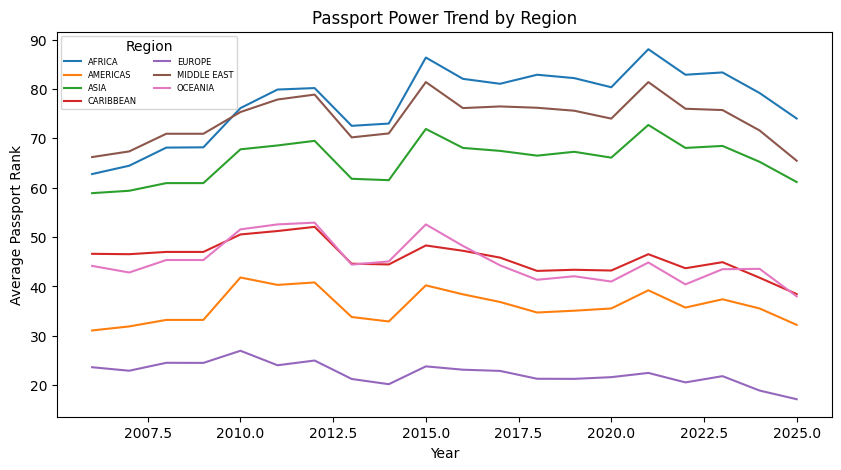

In [36]:
#### How has global passport power changed over time for different regions

rankings = rank_by_year.copy()
rankings.head()
region_rank = (rankings.groupby(["region", "year"], as_index = False)["rank"].mean().sort_values(["region", "year"]))
region_rank.head()


#Reshape the region so that each region is its own column ie so you can plot the regions on the y axis and the years on the x axis 
region_rank_wide = (region_rank.pivot(index = "year", columns = "region", values = "rank").sort_index()
                    .reset_index())
region_rank_wide.head()

#create line chare using the data frame 

region_rank_wide.plot(x = "year", y = region_rank_wide.columns[1:], kind = "line", 
                      figsize = (10,5), xlabel = "Year", ylabel = "Average Passport Rank", 
                      title = "Passport Power Trend by Region")

plt.legend(title = "Region", ncol = 2, fontsize = 6)
plt.tight_layout


<Axes: title={'center': 'Passport Rank vs Visa-free Access'}, xlabel='Visa-free destinations (average)', ylabel='Average passport rank'>

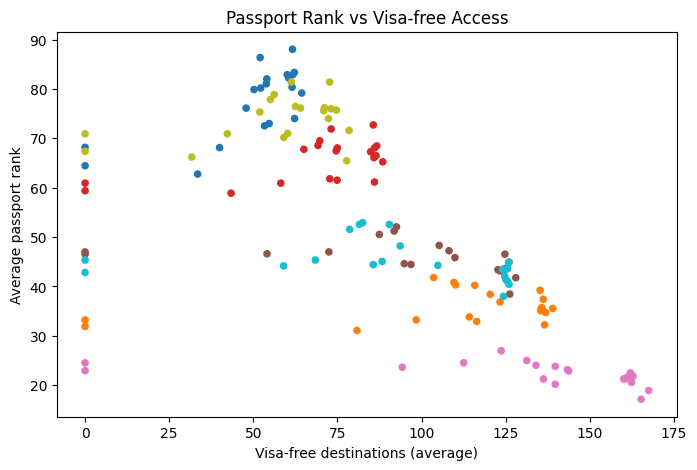

In [41]:
scatter_df = (
    rankings
    .dropna(subset=["region", "rank", "visa_free_count"])
    .groupby(["region", "year"], as_index=False)[["rank", "visa_free_count"]]
    .mean()
)

scatter_df["region_code"] = scatter_df["region"].astype("category").cat.codes
categories = scatter_df["region"].astype("category").cat.categories

scatter_df.plot(
    kind="scatter",
    x="visa_free_count",
    y="rank",
    c="region_code",
    cmap="tab10",
    colorbar=False,
    figsize=(8, 5),
    xlabel="Visa-free destinations (average)",
    ylabel="Average passport rank",
    title="Passport Rank vs Visa-free Access",
)

